In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [285]:
# Test with IWCD
# read 3D geometry file
geo_file = np.load("/fast_scratch/WatChMaL/data/geometries/geo_mPMTshort.npz")

In [278]:
start=0

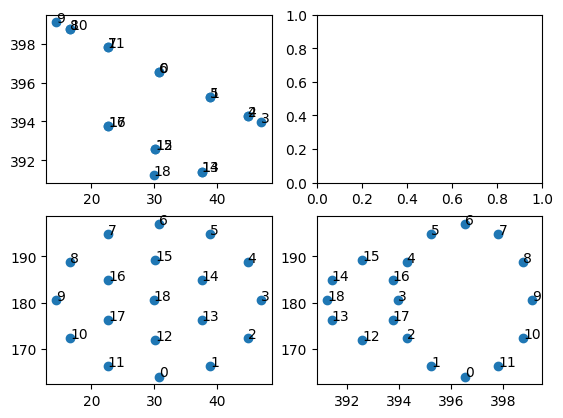

In [279]:
# plot first 19 PMTs to see arrangement of PMTs within mPMT
pmt_positions = geo_file['position'][start:start+19]
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(pmt_positions[:,2], pmt_positions[:,0], 'o')
axs[1,0].plot(pmt_positions[:,2], pmt_positions[:,1], 'o')
axs[1,1].plot(pmt_positions[:,0], pmt_positions[:,1], 'o')
for i, p in enumerate(pmt_positions):
    axs[0,0].text(p[2], p[0], i)
    axs[1,0].text(p[2], p[1], i)
    axs[1,1].text(p[0], p[1], i)

In [289]:
# Test with WCTE
# read 3D geometry file
geo_file = np.load("/fast_scratch/WatChMaL/data/geometries/wcte_full_geo.npz")

In [215]:
start=0

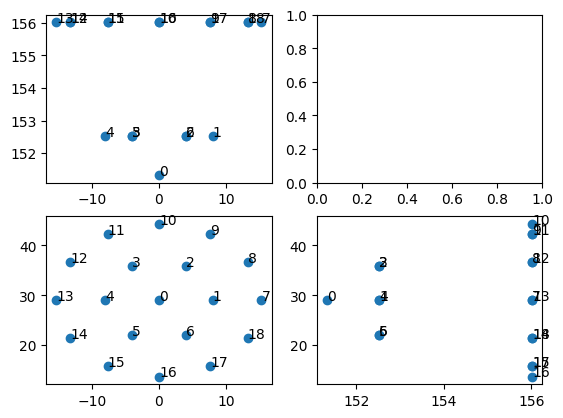

In [216]:
# plot first 19 PMTs to see arrangement of PMTs within mPMT
pmt_positions = geo_file['position'][start:start+19]
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(pmt_positions[:,2], pmt_positions[:,0], 'o')
axs[1,0].plot(pmt_positions[:,2], pmt_positions[:,1], 'o')
axs[1,1].plot(pmt_positions[:,0], pmt_positions[:,1], 'o')
for i, p in enumerate(pmt_positions):
    axs[0,0].text(p[2], p[0], i)
    axs[1,0].text(p[2], p[1], i)
    axs[1,1].text(p[0], p[1], i)

In [287]:
start=52*19

912 48


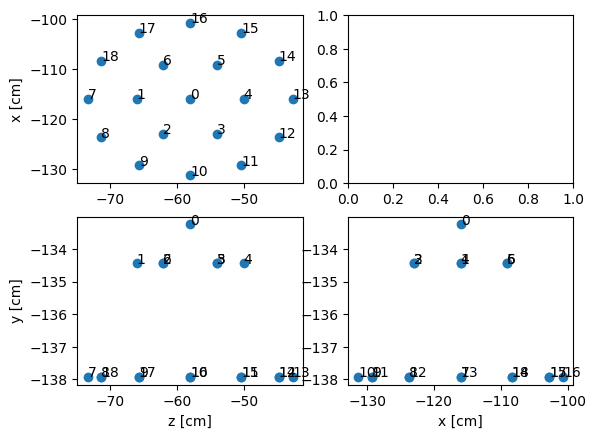

In [269]:
# plot next 19 PMTs to see arrangement of PMTs within mPMT
print(start, start//19)
pmt_positions = geo_file['position'][start:start+19]
fig, axs = plt.subplots(2, 2)
axs[0,0].plot(pmt_positions[:,2], pmt_positions[:,0], 'o')
axs[1,0].plot(pmt_positions[:,2], pmt_positions[:,1], 'o')
axs[1,1].plot(pmt_positions[:,0], pmt_positions[:,1], 'o')
axs[0,0].set_ylabel("x [cm]")
axs[1,0].set_xlabel("z [cm]")
axs[1,0].set_ylabel("y [cm]")
axs[1,1].set_xlabel("x [cm]")
for i, p in enumerate(pmt_positions):
    axs[0,0].text(p[2], p[0], i)
    axs[1,0].text(p[2], p[1], i)
    axs[1,1].text(p[0], p[1], i)
start += 19

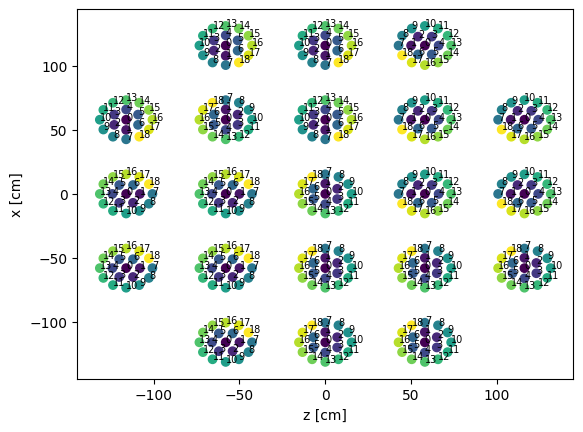

In [290]:
pmt_positions = geo_file['position'][85*19:(85+21)*19]
plt.scatter(pmt_positions[:,2], pmt_positions[:,0], c=np.arange(pmt_positions.shape[0])%19)
plt.ylabel("x [cm]")
plt.xlabel("z [cm]")
for i, p in enumerate(pmt_positions):
    plt.text(p[2], p[0], i%19, size=7)
start += 19

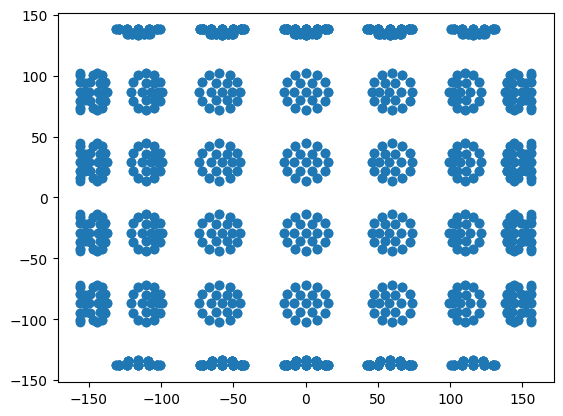

In [241]:
# plot positions of all PMTs
all_pmt_positions = geo_file['position'][:]
plt.plot(all_pmt_positions[:,0], all_pmt_positions[:,1], 'o')

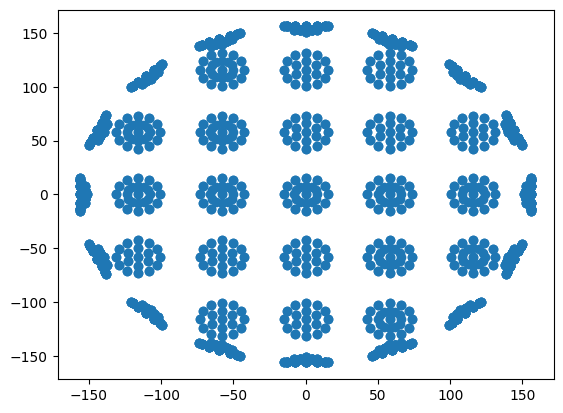

In [30]:
plt.plot(all_pmt_positions[:,0], all_pmt_positions[:,2], 'o')

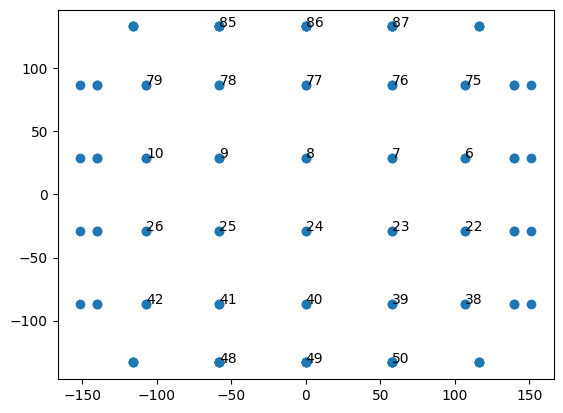

In [292]:
# plot positions of middle PMT of all mPMTs
mpmt_positions = geo_file['position'][::19]
plt.plot(mpmt_positions[:,2], mpmt_positions[:,1], 'o')
# annotate the mPMTs closest to the front
for i, p in enumerate(mpmt_positions):
    if p[0]<-100:
        plt.text(p[2], p[1], i)
# Note that the barrel mPMT indices increase from right to left, endcap mPMTs increase from left to right

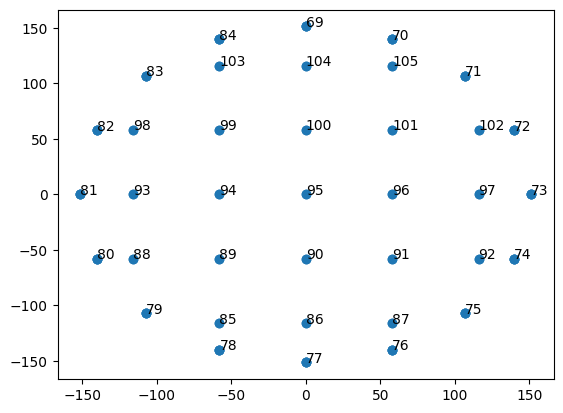

In [96]:
# top down view
plt.plot(mpmt_positions[:,2], mpmt_positions[:,0], 'o')
# annotate the mPMTs closest to the top
for i, p in enumerate(mpmt_positions):
    if p[1]>75:
        plt.text(p[2], p[0], i)

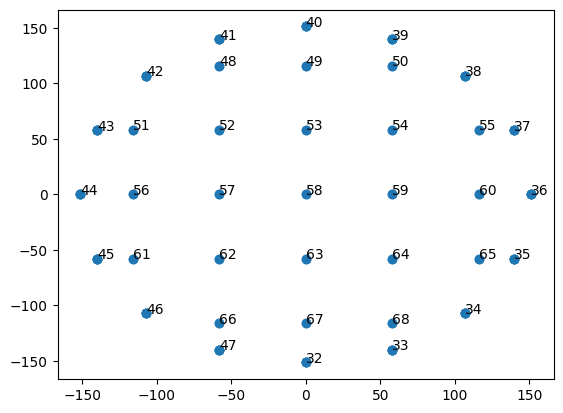

In [98]:
# bottom up view
plt.plot(mpmt_positions[:,2], -mpmt_positions[:,0], 'o')
# annotate the mPMTs closest to the bottom
for i, p in enumerate(mpmt_positions):
    if p[1]<-75:
        plt.text(p[2], -p[0], i)

In [53]:
# find mpmts by wall using vertical position
barrel = np.where(np.abs(mpmt_positions[:,1]) < 100)[0]
top_endcap = np.where(mpmt_positions[:,1] > 100)[0]
bottom_endcap = np.where(mpmt_positions[:,1] < -100)[0]

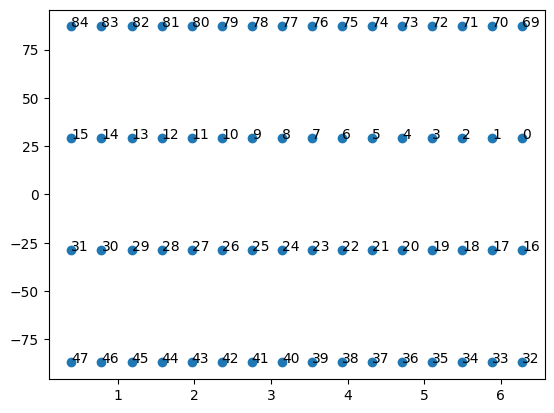

In [94]:
# plot barrel in phi vs y
# uses convention where:
#  mPMT 0 at (x,z)=(+R,0) is shown on the far right at phi=2pi
#  mPMT 8 at (x,z)=(-R,0) is shown in the middle at phi=pi
# so that mPMT IDs go in ascending order from right to left as seen in the above plots
phi = np.arctan2(-mpmt_positions[:,2], mpmt_positions[:,0])
phi[phi<0.00001] += 2*np.pi
plt.plot(phi[barrel], mpmt_positions[barrel,1], 'o')
for i in barrel:
    plt.text(phi[i], mpmt_positions[i,1], i)
# Note that it starts with the second row from the top, then third, then fourth (bottom) row, and finally the top row

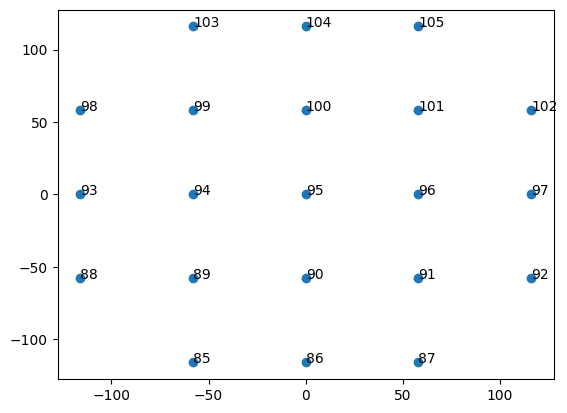

In [72]:
# plot top endcap
# plot z position on horizontal axis and x position on vertical axis so that
#  mPMT at (x,z)=(-X,0) at middle bottom of this plot aligns with
#  mPMT at (x,z)=(-R,0) at middle of barrel plot
plt.plot(mpmt_positions[top_endcap,0], mpmt_positions[top_endcap,2], 'o')
for i in top_endcap:
    plt.text(mpmt_positions[i,2], mpmt_positions[i,0], i)

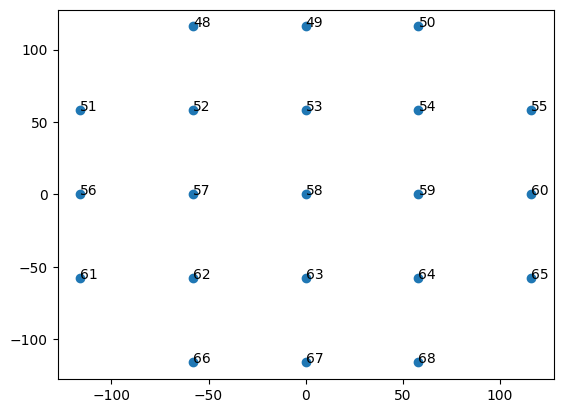

In [74]:
# plot bottom endcap
# plot z position on horizontal axis and -x position on vertical axis so that
#  mPMT at (x,z)=(-X,0) at middle top of this plot aligns with
#  mPMT at (x,z)=(-R,0) at middle of barrel plot
plt.plot(mpmt_positions[bottom_endcap,0], mpmt_positions[bottom_endcap,2], 'o')
for i in bottom_endcap:
    plt.text(mpmt_positions[i,2], -mpmt_positions[i,0], i)

In [120]:
# Finally, construct CNN image as:
# Barrel is 4 x 16 rows x columns, in rows 5 to 8, columns 0 to 15
#   mPMTs  0 to 15 are in row 6, columns descend from 15 to 0
#   mPMTs 16 to 31 are in row 7, columns descend from 15 to 0
#   mPMTs 32 to 47 are in row 8, columns descend from 15 to 0
#   mPMTs 69 to 84 are in row 5, columns descend from 15 to 0
# Top endcap is 5x5 square in rows 0 to 4, in columns 5 to 9
#   mPMTs  85 to  87 are in row 4, columns 6 to 8
#   mPMTs  88 to  92 are in row 3, columns 5 to 9
#   mPMTs  89 to  97 are in row 2, columns 5 to 9
#   mPMTs  98 to 102 are in row 1, columns 5 to 9
#   mPMTs 103 to 105 are in row 0, columns 6 to 8
# Bottom endcap is 5x5 quare in rows 9 to 13, columns 5 to 9
#   mPMTs 48 to 50 are in row  9, columns 6 to 8
#   mPMTs 51 to 55 are in row 10, columns 5 to 9
#   mPMTs 56 to 60 are in row 11, columns 5 to 9
#   mPMTs 61 to 65 are in row 12, columns 5 to 9
#   mPMTs 66 to 68 are in row 13, columns 6 to 8
mpmt_rows = np.hstack((
    [6]*16, [7]*16, [8]*16,                # bottom three barrel rows (mPMTs 0 to 47)
    [9]*3, [10]*5, [11]*5, [12]*5, [13]*3, # bottom endcap (mPMTs 48 to 68)
    [5]*16,                                # top barrel row (mPMTs 69 to 84)
    [4]*3, [3]*5, [2]*5, [1]*5, [0]*3,     # top endcap (mPMTs 85 to 105)
))
mpmt_columns = np.hstack((
    np.tile(np.arange(16)[::-1],3),  # bottom three barrel rows (mPMTs 0 to 47)
    [6,7,8], [5,6,7,8,9]*3, [6,7,8], # bottom endcap (mPMTs 48 to 68)
    np.arange(16)[::-1],             # top barrel row (mPMTs 69 to 84)
    [6,7,8], [5,6,7,8,9]*3, [6,7,8], # top endcap (mPMTs 85 to 105)
))
mpmt_image_positions = np.column_stack((mpmt_rows, mpmt_columns))

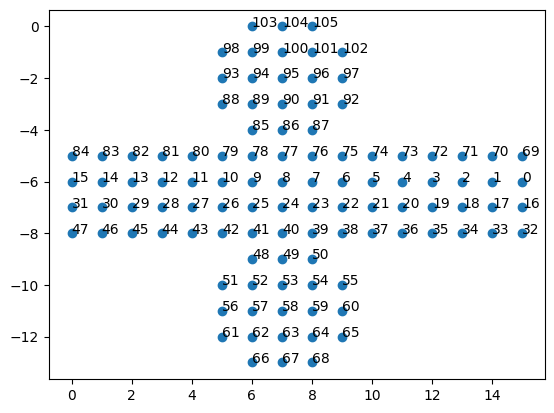

In [124]:
plt.plot(mpmt_image_positions[:,1],-mpmt_image_positions[:,0], 'o')
for i, p in enumerate(mpmt_image_positions):
    plt.text(p[1], -p[0], i)

In [135]:
np.savez("/fast_scratch/WatChMaL/data/geometries/WCTE_mPMT_image_positions.npz", mpmt_image_positions=mpmt_image_positions)